In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
directory = '../input/dog-breed-classification'

In [3]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Afgan Hound dog', 'Bulldog dog', 'Beagle dog', 'Borzoi dog', 'Bichon Frise dog', 'American Bulldog dog', 'Alaskan Malamute dog', 'Bocker dog', 'Affenhuahua dog', 'Bugg dog', 'Belgian Tervuren dog', 'Boxer dog', 'Auggie dog', 'Akita dog']
14


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
dataset=[]
testset=[]
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        if t<=20:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1
    count=count+1

In [6]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [7]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [8]:
data=np.array(data)
test=np.array(test)

In [9]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [10]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(235, 180, 180, 3)
(59, 180, 180, 3)
(235, 14)
(59, 14)


In [11]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [12]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74842112/74836368 [==============================] - 2s 0us/step


In [13]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(14, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
8/8 [==============================] - 37s 3s/step - loss: 3.1592 - accuracy: 0.1136 - val_loss: 3.0050 - val_accuracy: 0.1356
Epoch 2/30
8/8 [==============================] - 22s 3s/step - loss: 2.4603 - accuracy: 0.2092 - val_loss: 2.4620 - val_accuracy: 0.2712
Epoch 3/30
8/8 [==============================] - 23s 3s/step - loss: 2.0585 - accuracy: 0.3948 - val_loss: 2.1637 - val_accuracy: 0.3390
Epoch 4/30
8/8 [==============================] - 23s 3s/step - loss: 1.6921 - accuracy: 0.4837 - val_loss: 2.1065 - val_accuracy: 0.3559
Epoch 5/30
8/8 [==============================] - 22s 3s/step - loss: 1.5284 - accuracy: 0.5193 - val_loss: 1.9316 - val_accuracy: 0.4407
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 1.1512 - accuracy: 0.6629 - val_loss: 1.9239 - val_accuracy: 0.4746
Epoch 7/30
8/8 [==============================] - 22s 3s/step - loss: 1.1170 - accuracy: 0.6645 - val_loss: 1.8859 - val_accuracy: 0.5085
Epoch 8/30
8/8 [==================

In [16]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       1.00      0.60      0.75         5
           2       0.60      0.43      0.50         7
           3       0.67      1.00      0.80         2
           4       1.00      0.75      0.86         4
           5       0.20      0.33      0.25         3
           6       0.50      0.75      0.60         4
           7       1.00      0.25      0.40         4
           8       0.33      0.50      0.40         4
           9       0.67      0.67      0.67         3
          10       0.75      0.43      0.55         7
          11       0.29      0.50      0.36         4
          12       0.67      0.67      0.67         3
          13       0.75      0.75      0.75         4

    accuracy                           0.58        59
   macro avg       0.65      0.60      0.59        59
weighted avg       0.66      0.58      0.59        59



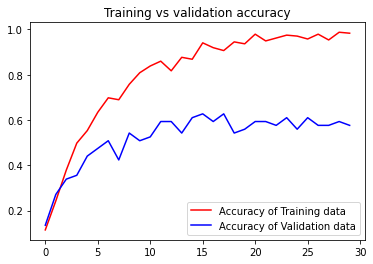

<Figure size 432x288 with 0 Axes>

In [17]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

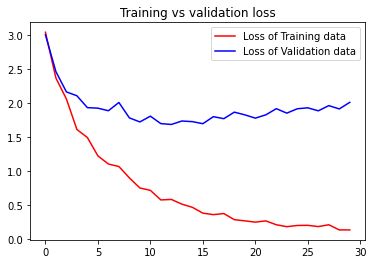

<Figure size 432x288 with 0 Axes>

In [18]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

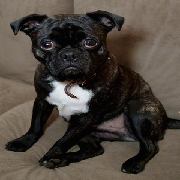

In [19]:
load_img("../input/dog-breed-classification/Bugg dog/Image_35.jpg",target_size=(180,180))

In [20]:
image=load_img("../input/dog-breed-classification/Bugg dog/Image_35.jpg",target_size=(180,180))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [21]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Bugg dog.


In [22]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(403, 180, 180, 3)
(403, 14)


In [23]:
ANS=testlabels0

In [24]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.5632754342431762
